<center><h1>MODEL ANN UNTUK PREDIKSI PENYAKIT DIABETES </h1>
Nama : Rosa Julia Erizka
    NIM: 09011282126105
    KELAS : SK5C

In [1]:
#import library yang dibutuhkan :
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import ndarray
import matplotlib.pyplot as plt

In [2]:
#memanggil dataset yang akan diproses untuk prediksi penyakit diabetes
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h2>PERSEBARAN DATA</h2>

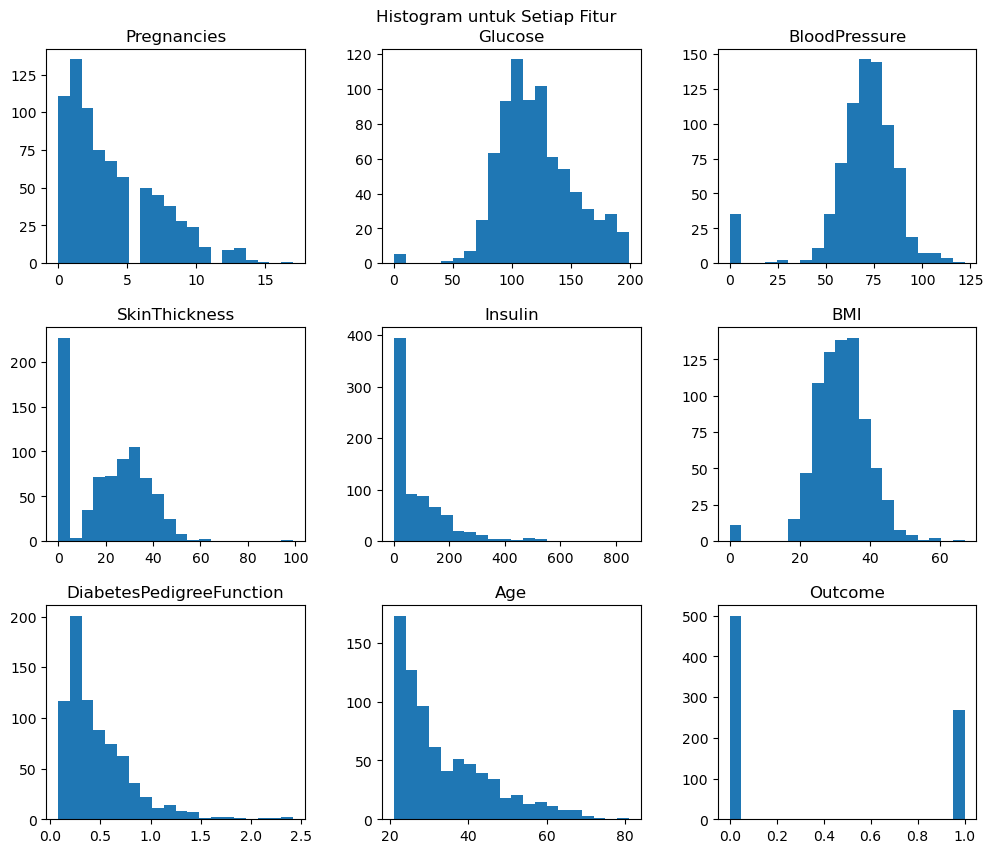

In [3]:
df.hist(figsize=(12, 10), bins=20, grid=False)
plt.suptitle("Histogram untuk Setiap Fitur", y=0.92)
plt.show()

<h2>DATA PRE-PROCESSING</h2>

<H4>FITUR PREGNANCIES :</H4>

In [4]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

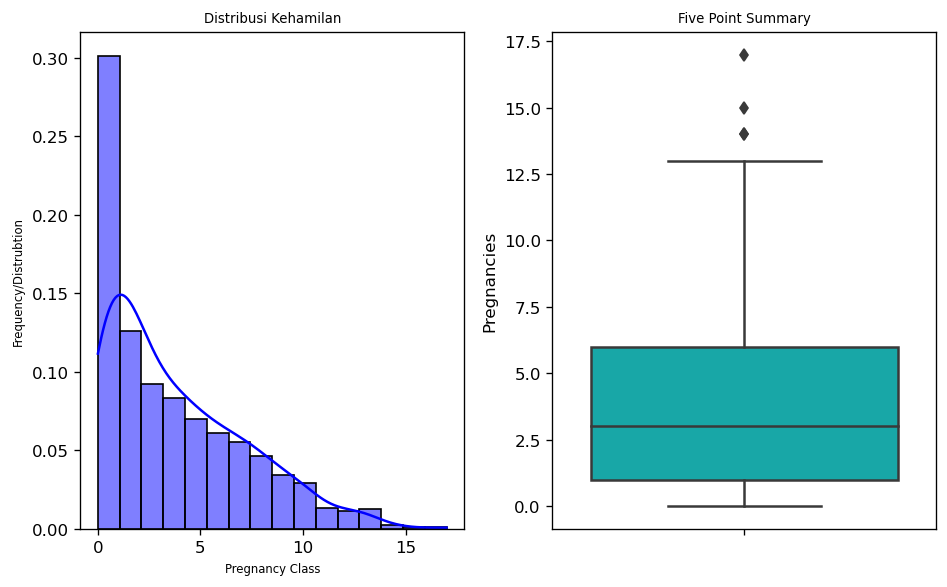

In [5]:
#Membuat plot dari fitur pregnacies untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,5))

plot00=sns.histplot(df['Pregnancies'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi Kehamilan',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='Pregnancies',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [6]:
#dilihat dari boxplot ada beberapa data outlier diantara >14 sehingga dapat dihapus saja:
count = (df['Pregnancies'] >= 14).sum()
print("Pregnancies >= 14: ", count)
#memasukkan fitur Pregnacies yang memiliki nila dibawah 14 kedalam variabel baru df 
df = df.loc[df['Pregnancies'] < 14]
print(df['Pregnancies'].describe())

Pregnancies >= 14:  4
count    764.000000
mean       3.786649
std        3.278714
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: Pregnancies, dtype: float64


<H4>FITUR Glucose :</H4>

In [7]:
df['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

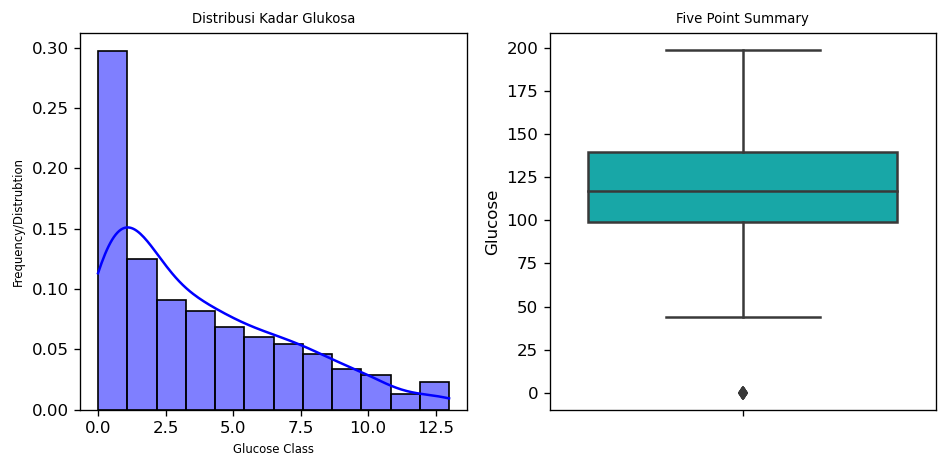

In [8]:
#Membuat plot dari fitur glucose se untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.histplot(df['Pregnancies'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi Kadar Glukosa',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='Glucose',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [9]:
#dilihat dari boxplot ada beberapa data bernilai 0:
count1 = (df['Glucose'] == 0).sum()
print("Glucose = 0: ", count1)
#memasukkan fitur Glucose yang memiliki nila dibawah 0 yang sudah direplace sesuai dengan mean pada fitur Glucose
#kedalam variabel baru df 
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
print(df['Glucose'].describe())

Glucose = 0:  5
count    764.000000
mean     121.566598
std       30.403080
min       44.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_20808\1657060683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Glucose = df.Glucose.replace(0,df.Glucose.mean())


<H4>FITUR BloodPressure :</H4>

In [10]:
df['BloodPressure'].describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

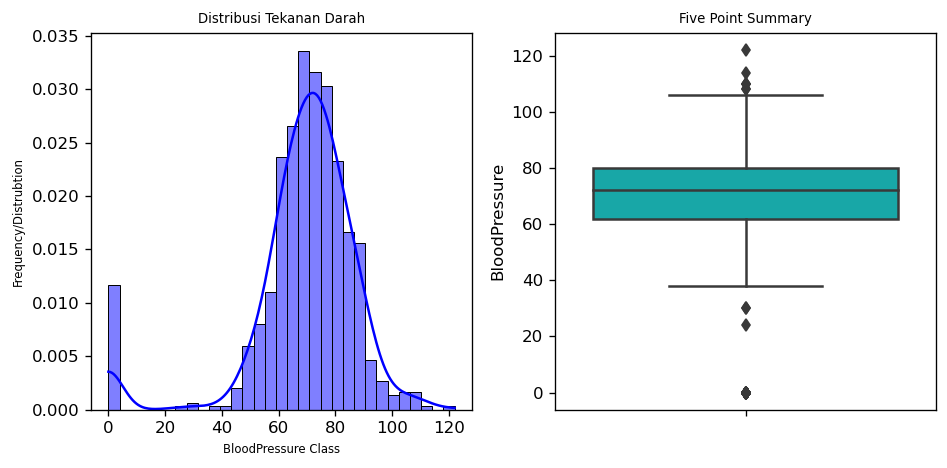

In [11]:
#Membuat plot dari fitur BloodPressure untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.histplot(df['BloodPressure'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi Tekanan Darah',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [12]:
#Dari boxplot ada data pencilan ditiga bagian sebagi berikut:
# Tekanan darah = 0
bp0 = (df['BloodPressure'] == 0).sum()
print("Data BloodPressure 0 =", bp0)

# Tekanan Darah 0 - 40
bprendah = df.query('BloodPressure > 0 and BloodPressure < 40')
bprendah = bprendah.BloodPressure.count()
print("Data BloodPressure 0 s.d. 40 =", bprendah)

# Tekanan darah > 100
bptinggi = (df['BloodPressure'] > 100).sum()
print("Data BloodPressure >100 =", bptinggi)

Data BloodPressure 0 = 35
Data BloodPressure 0 s.d. 40 = 4
Data BloodPressure >100 = 13


In [13]:
#Memasukan fitur BloodPressure dengan nilai 0 yang di-replace dengan mean dari BloodPreassure ke dalam variabel df:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.mean())
#Memasukan fitur BloodPressure dengan nilai>40 ke dalam variabel df:
df = df.loc[df['BloodPressure'] >=40 ]
print(df['BloodPressure'].describe())

count    760.000000
mean      72.483468
std       11.780719
min       40.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_20808\4280661795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.mean())


<H4>FITUR SkinThickness :</H4>

In [14]:
df['SkinThickness'].describe()

count    760.000000
mean      20.430263
std       15.976692
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

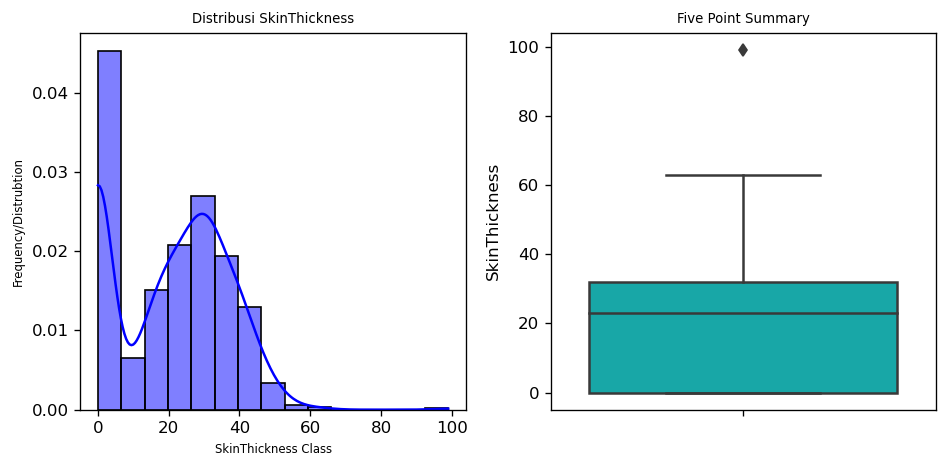

In [15]:
#Membuat plot dari fitur SkinThickness untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.histplot(df['SkinThickness'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='SkinThickness',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [16]:
#dilihat dari boxplot ada beberapa data bernilai 0 dan diatas 80:
# Skin Thickness = 0
count2 = (df['SkinThickness'] == 0).sum()
print("SkinThickness = 0: ", count2)
# Skin Thickness > 80
count3 = (df['SkinThickness'] > 80).sum()
print("Data SkinThickness > 80 =", count3)

SkinThickness = 0:  227
Data SkinThickness > 80 = 1


In [17]:
#mengubah fitur SkinThickness yang memiliki nila dibawah 0 yang sudah direplace sesuai dengan mean pada fitur SkinThickness
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
#memasukan semua nilai dibawah 80 dari fitur SkinThickness ke dalam variabel df
df = df.loc[df['SkinThickness'] < 80 ]
print(df['SkinThickness'].describe())

count    759.000000
mean      26.436983
std        9.290891
min        7.000000
25%       20.430263
50%       23.000000
75%       32.000000
max       63.000000
Name: SkinThickness, dtype: float64


<H4>FITUR Insulin :</H4>

In [18]:
df['Insulin'].describe()

count    759.000000
mean      79.777339
std      115.751482
min        0.000000
25%        0.000000
50%       23.000000
75%      128.500000
max      846.000000
Name: Insulin, dtype: float64

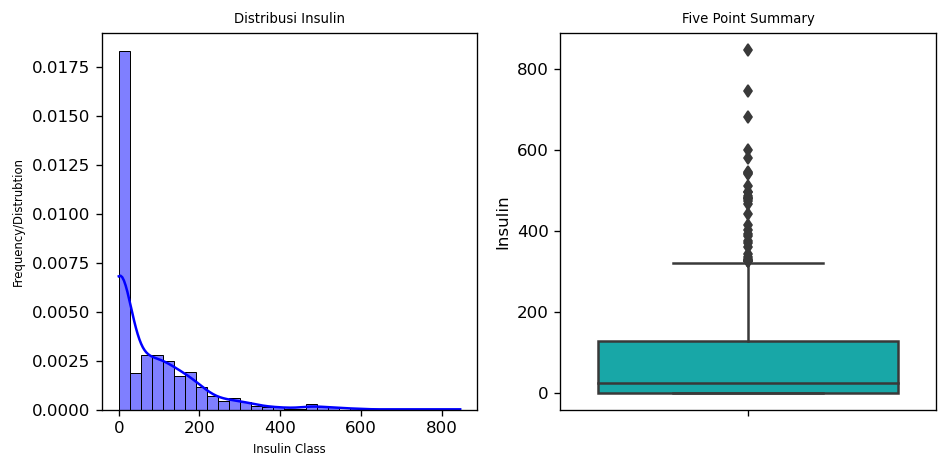

In [19]:
#Membuat plot dari fitur Insulin untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.histplot(df['Insulin'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='Insulin',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [20]:
#dilihat dari boxplot ada beberapa data bernilai 0 dan diatas 600 yang dianggap outlier:
# Skin Thickness = 0
count4 = (df['Insulin'] == 0).sum()
print("Insulin = 0: ", count4)
# Skin Thickness > 80
count5 = (df['Insulin'] > 600).sum()
print("Data Insulin > 600 =", count5)

Insulin = 0:  372
Data Insulin > 600 = 3


In [21]:
#melihat dari pesebaran nilai pada boxplot, nilai 0 akan displit menjadi 2 
#sesuai dengan hasil outcomenya negatif(0) atau positif(1)
# Memasukkan data yang nilai nya 0 ke df negatif diabetes
df_negatif = df.loc[df['Outcome'] == 0 ].copy()
# Memasukkan data yang nialinya 1 ke df positif diabetes
df_positif = df.loc[df['Outcome'] == 1 ].copy()

In [22]:
# Mengganti data bernilai 0 pada tiap variabel df negatif dan psotif sesuai dengan nilai mean-nya
df_negatif.Insulin = df_negatif.Insulin.replace(0, df_negatif.Insulin.mean())
df_positif.Insulin = df_positif.Insulin.replace(0, df_positif.Insulin.mean())

# data yang displit jadi positif dan negati digabungkkan menjadi satu fitur lagi dengan 
#pengindexan nilai negatif dlu baru yang positif diabet
df.drop(df.index, inplace=True)
df = df_negatif.append(df_positif)

C:\Users\USER\AppData\Local\Temp\ipykernel_20808\3593683201.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_negatif.append(df_positif)


In [23]:
#setelah digabungkan, kita memasukkan fitur Insulin ini ke variabel df yang baru dan menghapus outlier diatas 600:
df = df.loc[df['Insulin'] <= 600 ]
df.Insulin.describe()

count    756.000000
mean     116.667508
std       85.034260
min       14.000000
25%       68.748491
50%      100.000000
75%      126.250000
max      600.000000
Name: Insulin, dtype: float64

<H4>FITUR BMI :</H4>

In [24]:
df['BMI'].describe()

count    756.000000
mean      31.903571
std        7.834561
min        0.000000
25%       27.275000
50%       32.000000
75%       36.500000
max       67.100000
Name: BMI, dtype: float64

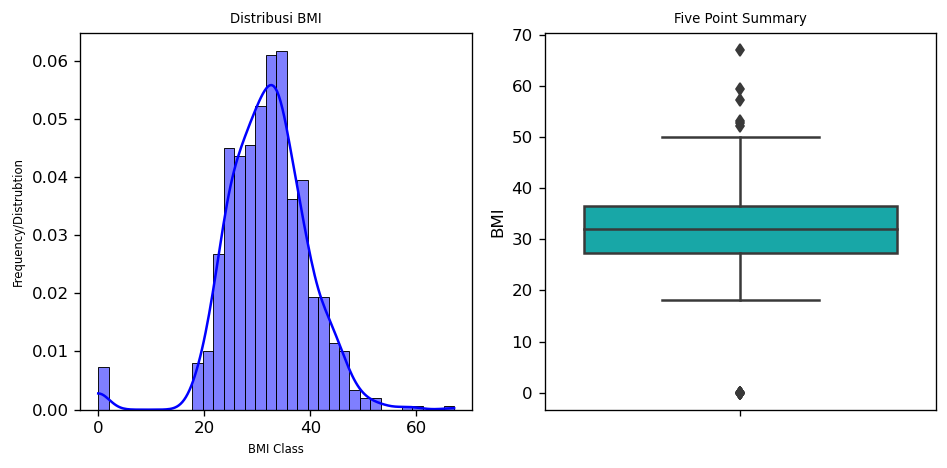

In [25]:
#Membuat plot dari fitur BMI untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.histplot(df['BMI'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [26]:
#Karena ada beberap nilai 0, dapat di relapce sesuai dengan mean dari BMI seperti berikut:
count6 = (df['BMI'] == 0).sum()
print("Data BMI 0 =", count6)
#memasukan hasil replace ke variabel df yang baru
df.BMI = df.BMI.replace(0,df.BMI.mean())
print(df['BMI'].describe())

Data BMI 0 = 11
count    756.000000
mean      32.367777
std        6.806992
min       18.200000
25%       27.500000
50%       32.000000
75%       36.500000
max       67.100000
Name: BMI, dtype: float64


<H4>FITUR DiabetesPedigreeFunction :</H4>

In [27]:
df['DiabetesPedigreeFunction'].describe()

count    756.000000
mean       0.470149
std        0.326213
min        0.078000
25%        0.243750
50%        0.369000
75%        0.627500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

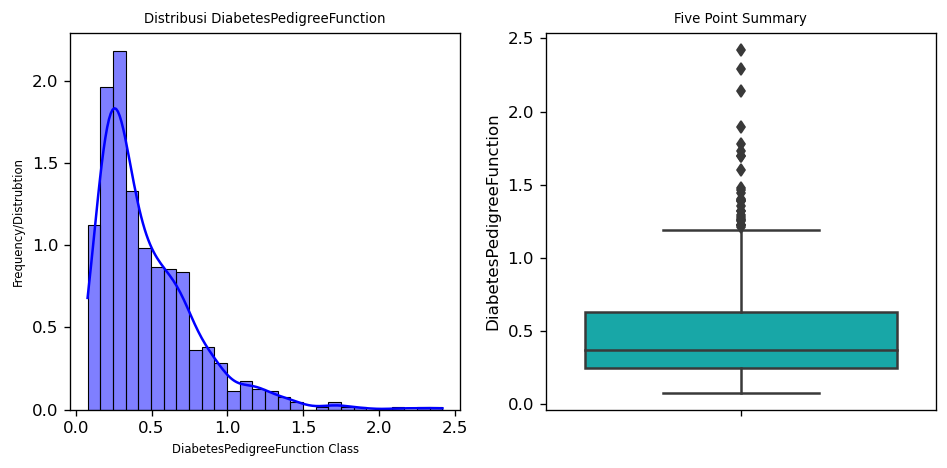

In [28]:
#Membuat plot dari fitur DiabetesPedigreeFunction untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.histplot(df['DiabetesPedigreeFunction'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi DiabetesPedigreeFunction',fontdict={'fontsize':8})
axes[0].set_xlabel('DiabetesPedigreeFunction Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='DiabetesPedigreeFunction',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [29]:
#dari boxplot diatas tidak terlau terlihat outlier nya:
print(df['DiabetesPedigreeFunction'].describe())

count    756.000000
mean       0.470149
std        0.326213
min        0.078000
25%        0.243750
50%        0.369000
75%        0.627500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


<H4>Fitur Age :</H4>

In [30]:
df['Age'].describe()

count    756.000000
mean      33.166667
std       11.722453
min       21.000000
25%       24.000000
50%       29.000000
75%       40.250000
max       81.000000
Name: Age, dtype: float64

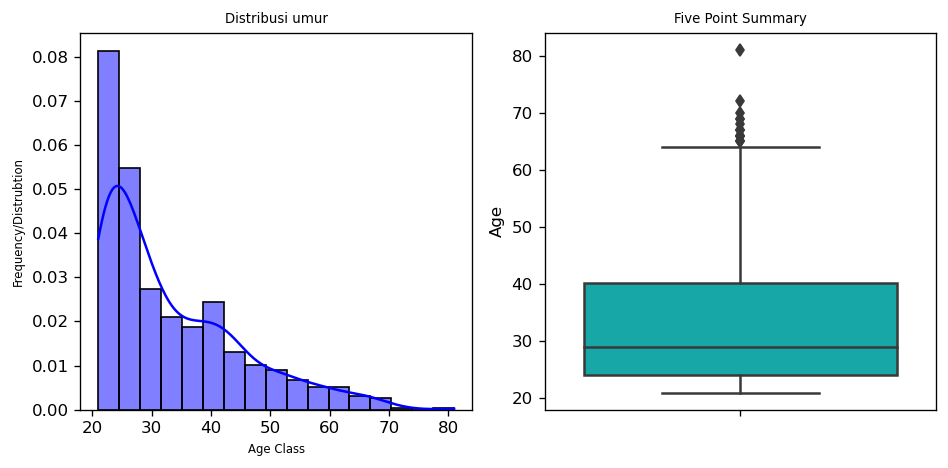

In [31]:
#Membuat plot dari fitur Age untuk melihat apakah ada data outlier :
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.histplot(df['Age'],ax=axes[0],color='b',kde=True,stat="density")
axes[0].set_title('Distribusi umur',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.boxplot(y='Age',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

<H4>Fitur Outcome :</H4>

In [32]:
df['Outcome'].describe()

count    756.000000
mean       0.345238
std        0.475761
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [33]:
#menghitung jumlah yang negatif (0) dan positif (1) diabetes dari Outcome:
df.Outcome.value_counts()

0    495
1    261
Name: Outcome, dtype: int64

In [34]:
#Setelah data dibersihkan, maka dimasukkan ke dalam file .csv sebagi berikut:
df.to_csv ('Data Diabetes PreProcessed.csv', index = False, header=True)

In [35]:
#memanggil data yang suda di lakukan preprocessing:
data = pd.read_csv('Data Diabetes PreProcessed.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.000000,29.000000,68.748491,26.6,0.351,31,0
1,1,89.0,66.000000,23.000000,94.000000,28.1,0.167,21,0
2,5,116.0,74.000000,20.430263,68.748491,25.6,0.201,30,0
3,10,115.0,69.098168,20.430263,68.748491,35.3,0.134,29,0
4,4,110.0,92.000000,20.430263,68.748491,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
751,1,128.0,88.000000,39.000000,110.000000,36.5,1.057,37,1
752,0,123.0,72.000000,20.430263,100.698473,36.3,0.258,52,1
753,6,190.0,92.000000,20.430263,100.698473,35.5,0.278,66,1
754,9,170.0,74.000000,31.000000,100.698473,44.0,0.403,43,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               756 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             756 non-null    float64
 3   SkinThickness             756 non-null    float64
 4   Insulin                   756 non-null    float64
 5   BMI                       756 non-null    float64
 6   DiabetesPedigreeFunction  756 non-null    float64
 7   Age                       756 non-null    int64  
 8   Outcome                   756 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 53.3 KB


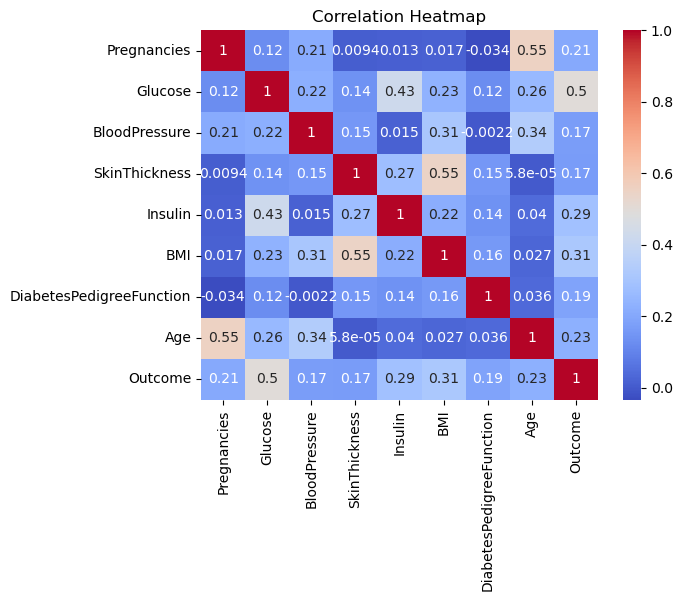

In [37]:
corr = data[['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap diatas dapat dilihat nilai korelasi tiap variabel independen terhadapat variabel dependen (outcome), dimana variabel independen Glucose memiliki nilai korelasi paling tinggi, sedangkan variabel independen BloodPresure dan SkinThickness memiliki nilai korelasi yang rendah

<h2>ALUR KERJA DARI ANN UNTUK PREDIKSI DIABETES :</h2>

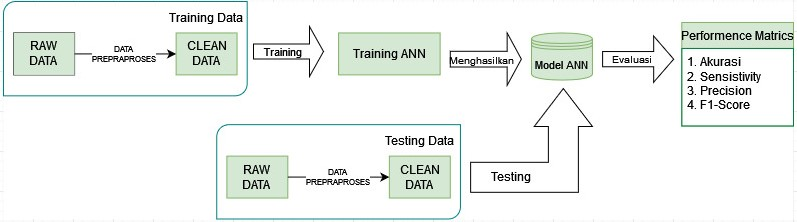

<h2>Pembagian/Split Data</h2>
Sesuai jurnal, pembagian data 70% data training, 20% data testing, dan 10% data validation

In [38]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'Outcome', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(529, 8)
(529,)
(151, 8)
(151,)
(76, 8)
(76,)


(None, None)

In [39]:
# Standarisasi Data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test  = s.fit_transform(X_test)

<h2>Pemodelan ANN</h2>
Berikut Struktur dari Model ANN yang saya buat, dengan 8 input, dan 2 hidden layer dimana masing-masing terdiri dari 12 node, serta output berupa outcome/hasil prediksi :

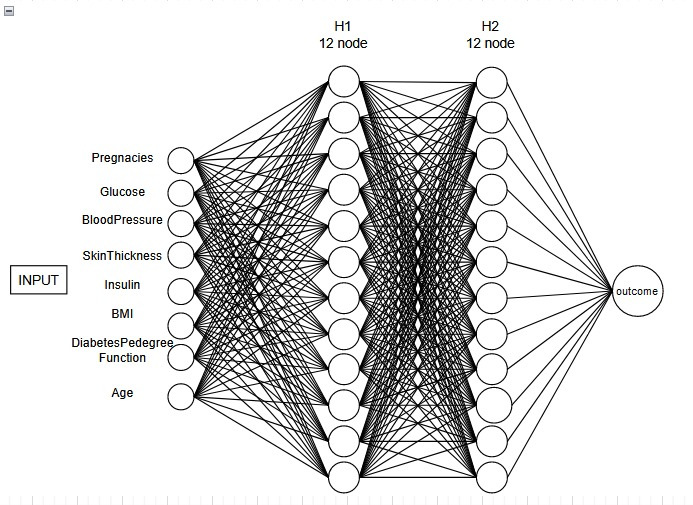

In [40]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import sklearn
from numpy import ndarray
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report

In [41]:
# Pemodelan ANN
model = Sequential()
#Menambahkan 2 hidden layer :
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# memasukan best model dengan model check poin dengan melihat akurasi tertinggi ke-dalam best_model.h5
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [43]:
#Melakukan training pada x dan y train dengan epoch sebanyak 2000 kali iterasi
fit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1, callbacks=[mc])
# load the saved model
saved_model = load_model('best_model.h5')

Epoch 1/1000
 1/17 [>.............................] - ETA: 19s - loss: 0.7294 - accuracy: 0.4375
Epoch 1: val_accuracy improved from -inf to 0.47368, saving model to best_model.h5
17/17 [==============================] - 2s 41ms/step - loss: 0.7249 - accuracy: 0.4405 - val_loss: 0.7038 - val_accuracy: 0.4737
Epoch 2/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.6742 - accuracy: 0.3750
Epoch 2: val_accuracy improved from 0.47368 to 0.61842, saving model to best_model.h5
17/17 [==============================] - 0s 10ms/step - loss: 0.6769 - accuracy: 0.5463 - val_loss: 0.6597 - val_accuracy: 0.6184
Epoch 3/1000
17/17 [==============================] - ETA: 0s - loss: 0.6369 - accuracy: 0.6975
Epoch 3: val_accuracy improved from 0.61842 to 0.72368, saving model to best_model.h5
17/17 [==============================] - 0s 10ms/step - loss: 0.6369 - accuracy: 0.6975 - val_loss: 0.6206 - val_accuracy: 0.7237
Epoch 4/1000
 1/17 [>.............................] - ETA: 0s - lo

Epoch 30/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.4237 - accuracy: 0.7812
Epoch 30: val_accuracy did not improve from 0.78947
17/17 [==============================] - 0s 6ms/step - loss: 0.4021 - accuracy: 0.8129 - val_loss: 0.4535 - val_accuracy: 0.7895
Epoch 31/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.4266 - accuracy: 0.8125
Epoch 31: val_accuracy did not improve from 0.78947
17/17 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8129 - val_loss: 0.4533 - val_accuracy: 0.7895
Epoch 32/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8438
Epoch 32: val_accuracy did not improve from 0.78947
17/17 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8129 - val_loss: 0.4515 - val_accuracy: 0.7895
Epoch 33/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.4417 - accuracy: 0.8438
Epoch 33: val_accuracy did not improve from 0.78947
17/17 [==========

 1/17 [>.............................] - ETA: 0s - loss: 0.2417 - accuracy: 0.9062
Epoch 59: val_accuracy did not improve from 0.82895
17/17 [==============================] - 0s 6ms/step - loss: 0.3712 - accuracy: 0.8318 - val_loss: 0.4185 - val_accuracy: 0.8289
Epoch 60/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.4793 - accuracy: 0.8438
Epoch 60: val_accuracy did not improve from 0.82895
17/17 [==============================] - 0s 6ms/step - loss: 0.3703 - accuracy: 0.8280 - val_loss: 0.4189 - val_accuracy: 0.8289
Epoch 61/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3960 - accuracy: 0.7812
Epoch 61: val_accuracy did not improve from 0.82895
17/17 [==============================] - 0s 6ms/step - loss: 0.3680 - accuracy: 0.8299 - val_loss: 0.4159 - val_accuracy: 0.8289
Epoch 62/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.3661 - accuracy: 0.8281
Epoch 62: val_accuracy did not improve from 0.82895
17/17 [========================

 1/17 [>.............................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7812
Epoch 88: val_accuracy did not improve from 0.86842
17/17 [==============================] - 0s 6ms/step - loss: 0.3317 - accuracy: 0.8412 - val_loss: 0.3644 - val_accuracy: 0.8684
Epoch 89/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.4371 - accuracy: 0.7500
Epoch 89: val_accuracy did not improve from 0.86842
17/17 [==============================] - 0s 6ms/step - loss: 0.3303 - accuracy: 0.8393 - val_loss: 0.3618 - val_accuracy: 0.8684
Epoch 90/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1941 - accuracy: 0.9375
Epoch 90: val_accuracy did not improve from 0.86842
17/17 [==============================] - 0s 6ms/step - loss: 0.3279 - accuracy: 0.8431 - val_loss: 0.3618 - val_accuracy: 0.8684
Epoch 91/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3300 - accuracy: 0.8750
Epoch 91: val_accuracy did not improve from 0.86842
17/17 [========================

 1/17 [>.............................] - ETA: 0s - loss: 0.4253 - accuracy: 0.7188
Epoch 117: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 6ms/step - loss: 0.2816 - accuracy: 0.8790 - val_loss: 0.3216 - val_accuracy: 0.8684
Epoch 118/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1400 - accuracy: 0.9688
Epoch 118: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 6ms/step - loss: 0.2803 - accuracy: 0.8866 - val_loss: 0.3242 - val_accuracy: 0.8684
Epoch 119/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8438
Epoch 119: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 6ms/step - loss: 0.2797 - accuracy: 0.8866 - val_loss: 0.3245 - val_accuracy: 0.8684
Epoch 120/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2620 - accuracy: 0.8750
Epoch 120: val_accuracy did not improve from 0.88158
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.1734 - accuracy: 0.9688
Epoch 146: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2558 - accuracy: 0.8998 - val_loss: 0.3043 - val_accuracy: 0.8816
Epoch 147/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8750
Epoch 147: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2554 - accuracy: 0.9017 - val_loss: 0.3054 - val_accuracy: 0.8816
Epoch 148/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2033 - accuracy: 0.9062
Epoch 148: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2553 - accuracy: 0.9017 - val_loss: 0.3022 - val_accuracy: 0.8816
Epoch 149/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2787 - accuracy: 0.9688
Epoch 149: val_accuracy did not improve from 0.88158
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.4884 - accuracy: 0.8438
Epoch 175: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2386 - accuracy: 0.9074 - val_loss: 0.3038 - val_accuracy: 0.8684
Epoch 176/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2501 - accuracy: 0.8750
Epoch 176: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2379 - accuracy: 0.9074 - val_loss: 0.3072 - val_accuracy: 0.8684
Epoch 177/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9375
Epoch 177: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2376 - accuracy: 0.9055 - val_loss: 0.3001 - val_accuracy: 0.8816
Epoch 178/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2214 - accuracy: 0.9062
Epoch 178: val_accuracy did not improve from 0.88158
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8438
Epoch 204: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 8ms/step - loss: 0.2222 - accuracy: 0.9130 - val_loss: 0.3059 - val_accuracy: 0.8684
Epoch 205/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8750
Epoch 205: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2215 - accuracy: 0.9112 - val_loss: 0.3007 - val_accuracy: 0.8684
Epoch 206/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3531 - accuracy: 0.9062
Epoch 206: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2212 - accuracy: 0.9112 - val_loss: 0.3037 - val_accuracy: 0.8684
Epoch 207/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1186 - accuracy: 0.9375
Epoch 207: val_accuracy did not improve from 0.88158
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.4195 - accuracy: 0.8750
Epoch 233: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 6ms/step - loss: 0.2091 - accuracy: 0.9206 - val_loss: 0.2975 - val_accuracy: 0.8816
Epoch 234/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1311 - accuracy: 0.9375
Epoch 234: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 7ms/step - loss: 0.2089 - accuracy: 0.9225 - val_loss: 0.2964 - val_accuracy: 0.8816
Epoch 235/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1714 - accuracy: 0.9375
Epoch 235: val_accuracy did not improve from 0.88158
17/17 [==============================] - 0s 6ms/step - loss: 0.2083 - accuracy: 0.9225 - val_loss: 0.2978 - val_accuracy: 0.8816
Epoch 236/1000
17/17 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9244
Epoch 236: val_accuracy did not improve from 0.88158
17/17 [=================

17/17 [==============================] - ETA: 0s - loss: 0.1985 - accuracy: 0.9319
Epoch 262: val_accuracy did not improve from 0.89474
17/17 [==============================] - 0s 8ms/step - loss: 0.1985 - accuracy: 0.9319 - val_loss: 0.2944 - val_accuracy: 0.8947
Epoch 263/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1484 - accuracy: 0.9375
Epoch 263: val_accuracy did not improve from 0.89474
17/17 [==============================] - 0s 9ms/step - loss: 0.1978 - accuracy: 0.9301 - val_loss: 0.2909 - val_accuracy: 0.8947
Epoch 264/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1690 - accuracy: 0.9375
Epoch 264: val_accuracy did not improve from 0.89474
17/17 [==============================] - 0s 6ms/step - loss: 0.1973 - accuracy: 0.9301 - val_loss: 0.2942 - val_accuracy: 0.8947
Epoch 265/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3704 - accuracy: 0.9062
Epoch 265: val_accuracy did not improve from 0.89474
17/17 [=================

17/17 [==============================] - ETA: 0s - loss: 0.1858 - accuracy: 0.9357
Epoch 291: val_accuracy did not improve from 0.89474
17/17 [==============================] - 0s 8ms/step - loss: 0.1858 - accuracy: 0.9357 - val_loss: 0.2944 - val_accuracy: 0.8947
Epoch 292/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8750
Epoch 292: val_accuracy did not improve from 0.89474
17/17 [==============================] - 0s 7ms/step - loss: 0.1855 - accuracy: 0.9338 - val_loss: 0.2925 - val_accuracy: 0.8947
Epoch 293/1000
12/17 [====================>.........] - ETA: 0s - loss: 0.1804 - accuracy: 0.9401
Epoch 293: val_accuracy did not improve from 0.89474
17/17 [==============================] - 0s 10ms/step - loss: 0.1855 - accuracy: 0.9376 - val_loss: 0.2927 - val_accuracy: 0.8947
Epoch 294/1000
13/17 [=====================>........] - ETA: 0s - loss: 0.1819 - accuracy: 0.9423
Epoch 294: val_accuracy did not improve from 0.89474
17/17 [================

13/17 [=====================>........] - ETA: 0s - loss: 0.1759 - accuracy: 0.9375
Epoch 320: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1762 - accuracy: 0.9357 - val_loss: 0.2926 - val_accuracy: 0.8947
Epoch 321/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.1758 - accuracy: 0.9316
Epoch 321: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1755 - accuracy: 0.9319 - val_loss: 0.2951 - val_accuracy: 0.8816
Epoch 322/1000
17/17 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9338
Epoch 322: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1749 - accuracy: 0.9338 - val_loss: 0.2931 - val_accuracy: 0.8816
Epoch 323/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1420 - accuracy: 0.9688
Epoch 323: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.3312 - accuracy: 0.9375
Epoch 349: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.1668 - accuracy: 0.9395 - val_loss: 0.2998 - val_accuracy: 0.8816
Epoch 350/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1399 - accuracy: 0.9375
Epoch 350: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1669 - accuracy: 0.9395 - val_loss: 0.3008 - val_accuracy: 0.8816
Epoch 351/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.1558 - accuracy: 0.9479
Epoch 351: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1659 - accuracy: 0.9433 - val_loss: 0.3024 - val_accuracy: 0.8816
Epoch 352/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1290 - accuracy: 1.0000
Epoch 352: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.1758 - accuracy: 0.9062
Epoch 378: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1586 - accuracy: 0.9509 - val_loss: 0.3116 - val_accuracy: 0.8816
Epoch 379/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.1492 - accuracy: 0.9479
Epoch 379: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1584 - accuracy: 0.9452 - val_loss: 0.3098 - val_accuracy: 0.8816
Epoch 380/1000
17/17 [==============================] - ETA: 0s - loss: 0.1581 - accuracy: 0.9414
Epoch 380: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1581 - accuracy: 0.9414 - val_loss: 0.3086 - val_accuracy: 0.8816
Epoch 381/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9688
Epoch 381: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0795 - accuracy: 0.9688
Epoch 407: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1519 - accuracy: 0.9471 - val_loss: 0.3096 - val_accuracy: 0.8816
Epoch 408/1000
17/17 [==============================] - ETA: 0s - loss: 0.1501 - accuracy: 0.9509
Epoch 408: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 9ms/step - loss: 0.1501 - accuracy: 0.9509 - val_loss: 0.3086 - val_accuracy: 0.8816
Epoch 409/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.1346 - accuracy: 0.9542
Epoch 409: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 9ms/step - loss: 0.1494 - accuracy: 0.9490 - val_loss: 0.3085 - val_accuracy: 0.8816
Epoch 410/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1344 - accuracy: 0.9688
Epoch 410: val_accuracy did not improve from 0.90789
17/17 [=================

17/17 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9490
Epoch 436: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1427 - accuracy: 0.9490 - val_loss: 0.3156 - val_accuracy: 0.8816
Epoch 437/1000
17/17 [==============================] - ETA: 0s - loss: 0.1438 - accuracy: 0.9490
Epoch 437: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1438 - accuracy: 0.9490 - val_loss: 0.3207 - val_accuracy: 0.8816
Epoch 438/1000
17/17 [==============================] - ETA: 0s - loss: 0.1422 - accuracy: 0.9490
Epoch 438: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1422 - accuracy: 0.9490 - val_loss: 0.3176 - val_accuracy: 0.8816
Epoch 439/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8438
Epoch 439: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0936 - accuracy: 0.9688
Epoch 465: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1356 - accuracy: 0.9527 - val_loss: 0.3248 - val_accuracy: 0.8816
Epoch 466/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.3215 - accuracy: 0.9375
Epoch 466: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.1346 - accuracy: 0.9565 - val_loss: 0.3283 - val_accuracy: 0.8816
Epoch 467/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0952 - accuracy: 0.9688
Epoch 467: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.1351 - accuracy: 0.9509 - val_loss: 0.3289 - val_accuracy: 0.8816
Epoch 468/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0803 - accuracy: 0.9688
Epoch 468: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.1076 - accuracy: 0.9375
Epoch 494: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.1282 - accuracy: 0.9622 - val_loss: 0.3434 - val_accuracy: 0.8816
Epoch 495/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0864 - accuracy: 1.0000
Epoch 495: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.1288 - accuracy: 0.9565 - val_loss: 0.3478 - val_accuracy: 0.8816
Epoch 496/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1383 - accuracy: 0.9688
Epoch 496: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.9546 - val_loss: 0.3466 - val_accuracy: 0.8816
Epoch 497/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2187 - accuracy: 0.8750
Epoch 497: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.1003 - accuracy: 0.9688
Epoch 523: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1219 - accuracy: 0.9622 - val_loss: 0.3623 - val_accuracy: 0.8816
Epoch 524/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.1125 - accuracy: 0.9648
Epoch 524: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1204 - accuracy: 0.9641 - val_loss: 0.3579 - val_accuracy: 0.8816
Epoch 525/1000
17/17 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9641
Epoch 525: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1211 - accuracy: 0.9641 - val_loss: 0.3625 - val_accuracy: 0.8816
Epoch 526/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1442 - accuracy: 0.9375
Epoch 526: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.1969 - accuracy: 0.8750
Epoch 552: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.1140 - accuracy: 0.9641 - val_loss: 0.3803 - val_accuracy: 0.8816
Epoch 553/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1058 - accuracy: 0.9688
Epoch 553: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1139 - accuracy: 0.9679 - val_loss: 0.3769 - val_accuracy: 0.8816
Epoch 554/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.2034 - accuracy: 0.9375
Epoch 554: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1133 - accuracy: 0.9679 - val_loss: 0.3764 - val_accuracy: 0.8816
Epoch 555/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0484 - accuracy: 0.9688
Epoch 555: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.1586 - accuracy: 0.9375
Epoch 581: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1075 - accuracy: 0.9679 - val_loss: 0.3863 - val_accuracy: 0.8816
Epoch 582/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.1100 - accuracy: 0.9665
Epoch 582: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1067 - accuracy: 0.9679 - val_loss: 0.3909 - val_accuracy: 0.8816
Epoch 583/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1303 - accuracy: 0.9062
Epoch 583: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1072 - accuracy: 0.9641 - val_loss: 0.3923 - val_accuracy: 0.8816
Epoch 584/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0859 - accuracy: 0.9688
Epoch 584: val_accuracy did not improve from 0.90789
17/17 [=================

12/17 [====================>.........] - ETA: 0s - loss: 0.1006 - accuracy: 0.9609
Epoch 610: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 9ms/step - loss: 0.1004 - accuracy: 0.9641 - val_loss: 0.4032 - val_accuracy: 0.8816
Epoch 611/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0808 - accuracy: 0.9688
Epoch 611: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.1005 - accuracy: 0.9679 - val_loss: 0.3996 - val_accuracy: 0.8816
Epoch 612/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.1045 - accuracy: 0.9665
Epoch 612: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0999 - accuracy: 0.9698 - val_loss: 0.4033 - val_accuracy: 0.8816
Epoch 613/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0674 - accuracy: 1.0000
Epoch 613: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.1358 - accuracy: 0.9688
Epoch 639: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0959 - accuracy: 0.9735 - val_loss: 0.4275 - val_accuracy: 0.8816
Epoch 640/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.0955 - accuracy: 0.9727
Epoch 640: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0962 - accuracy: 0.9716 - val_loss: 0.4200 - val_accuracy: 0.8816
Epoch 641/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1466 - accuracy: 0.9688
Epoch 641: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0952 - accuracy: 0.9754 - val_loss: 0.4188 - val_accuracy: 0.8816
Epoch 642/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0767 - accuracy: 0.9688
Epoch 642: val_accuracy did not improve from 0.90789
17/17 [=================

17/17 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9698
Epoch 668: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0900 - accuracy: 0.9698 - val_loss: 0.4408 - val_accuracy: 0.8816
Epoch 669/1000
13/17 [=====================>........] - ETA: 0s - loss: 0.0804 - accuracy: 0.9760
Epoch 669: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0902 - accuracy: 0.9698 - val_loss: 0.4400 - val_accuracy: 0.8816
Epoch 670/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0894 - accuracy: 1.0000
Epoch 670: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0895 - accuracy: 0.9754 - val_loss: 0.4345 - val_accuracy: 0.8684
Epoch 671/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0579 - accuracy: 1.0000
Epoch 671: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0974 - accuracy: 0.9688
Epoch 697: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.0856 - accuracy: 0.9735 - val_loss: 0.4581 - val_accuracy: 0.8684
Epoch 698/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0668 - accuracy: 0.9688
Epoch 698: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0856 - accuracy: 0.9735 - val_loss: 0.4573 - val_accuracy: 0.8816
Epoch 699/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1865 - accuracy: 0.8750
Epoch 699: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.0844 - accuracy: 0.9754 - val_loss: 0.4524 - val_accuracy: 0.8816
Epoch 700/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1094 - accuracy: 0.9688
Epoch 700: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0346 - accuracy: 1.0000
Epoch 726: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0798 - accuracy: 0.9773 - val_loss: 0.4707 - val_accuracy: 0.8553
Epoch 727/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0564 - accuracy: 1.0000
Epoch 727: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0797 - accuracy: 0.9792 - val_loss: 0.4706 - val_accuracy: 0.8684
Epoch 728/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0755 - accuracy: 1.0000
Epoch 728: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0804 - accuracy: 0.9773 - val_loss: 0.4795 - val_accuracy: 0.8553
Epoch 729/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0312 - accuracy: 1.0000
Epoch 729: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0340 - accuracy: 1.0000
Epoch 755: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0762 - accuracy: 0.9754 - val_loss: 0.4870 - val_accuracy: 0.8684
Epoch 756/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0658 - accuracy: 0.9688
Epoch 756: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0766 - accuracy: 0.9735 - val_loss: 0.4835 - val_accuracy: 0.8684
Epoch 757/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0641 - accuracy: 0.9688
Epoch 757: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0761 - accuracy: 0.9698 - val_loss: 0.4997 - val_accuracy: 0.8684
Epoch 758/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.1100 - accuracy: 0.9688
Epoch 758: val_accuracy did not improve from 0.90789
17/17 [=================

17/17 [==============================] - ETA: 0s - loss: 0.0713 - accuracy: 0.9792
Epoch 784: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0713 - accuracy: 0.9792 - val_loss: 0.5061 - val_accuracy: 0.8421
Epoch 785/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0436 - accuracy: 1.0000
Epoch 785: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.0712 - accuracy: 0.9792 - val_loss: 0.5037 - val_accuracy: 0.8553
Epoch 786/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.0704 - accuracy: 0.9792
Epoch 786: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0708 - accuracy: 0.9792 - val_loss: 0.5072 - val_accuracy: 0.8553
Epoch 787/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0911 - accuracy: 0.9688
Epoch 787: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0240 - accuracy: 1.0000
Epoch 813: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 6ms/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.5194 - val_accuracy: 0.8421
Epoch 814/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0601 - accuracy: 1.0000
Epoch 814: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0666 - accuracy: 0.9792 - val_loss: 0.5193 - val_accuracy: 0.8684
Epoch 815/1000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0571 - accuracy: 0.9931
Epoch 815: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 11ms/step - loss: 0.0674 - accuracy: 0.9811 - val_loss: 0.5252 - val_accuracy: 0.8421
Epoch 816/1000
11/17 [==================>...........] - ETA: 0s - loss: 0.0623 - accuracy: 0.9801
Epoch 816: val_accuracy did not improve from 0.90789
17/17 [================

 1/17 [>.............................] - ETA: 0s - loss: 0.1051 - accuracy: 0.9375
Epoch 842: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0647 - accuracy: 0.9811 - val_loss: 0.5345 - val_accuracy: 0.8421
Epoch 843/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0394 - accuracy: 1.0000
Epoch 843: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.5320 - val_accuracy: 0.8553
Epoch 844/1000
17/17 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9830
Epoch 844: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0640 - accuracy: 0.9830 - val_loss: 0.5245 - val_accuracy: 0.8553
Epoch 845/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0848 - accuracy: 0.9688
Epoch 845: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0363 - accuracy: 1.0000
Epoch 871: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0622 - accuracy: 0.9811 - val_loss: 0.5526 - val_accuracy: 0.8553
Epoch 872/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0201 - accuracy: 1.0000
Epoch 872: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0612 - accuracy: 0.9830 - val_loss: 0.5449 - val_accuracy: 0.8553
Epoch 873/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0301 - accuracy: 1.0000
Epoch 873: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0587 - accuracy: 0.9849 - val_loss: 0.5516 - val_accuracy: 0.8553
Epoch 874/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0397 - accuracy: 1.0000
Epoch 874: val_accuracy did not improve from 0.90789
17/17 [=================

12/17 [====================>.........] - ETA: 0s - loss: 0.0560 - accuracy: 0.9922
Epoch 900: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9887 - val_loss: 0.5624 - val_accuracy: 0.8553
Epoch 901/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0859 - accuracy: 1.0000
Epoch 901: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0560 - accuracy: 0.9868 - val_loss: 0.5585 - val_accuracy: 0.8684
Epoch 902/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0746 - accuracy: 0.9688
Epoch 902: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0558 - accuracy: 0.9868 - val_loss: 0.5618 - val_accuracy: 0.8553
Epoch 903/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0697 - accuracy: 0.9688
Epoch 903: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0214 - accuracy: 1.0000
Epoch 929: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0533 - accuracy: 0.9887 - val_loss: 0.5830 - val_accuracy: 0.8553
Epoch 930/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 930: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9887 - val_loss: 0.5760 - val_accuracy: 0.8553
Epoch 931/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0155 - accuracy: 1.0000
Epoch 931: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0539 - accuracy: 0.9887 - val_loss: 0.5823 - val_accuracy: 0.8684
Epoch 932/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0362 - accuracy: 1.0000
Epoch 932: val_accuracy did not improve from 0.90789
17/17 [=================

17/17 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9887
Epoch 958: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0513 - accuracy: 0.9887 - val_loss: 0.5889 - val_accuracy: 0.8553
Epoch 959/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0505 - accuracy: 1.0000
Epoch 959: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0501 - accuracy: 0.9887 - val_loss: 0.5844 - val_accuracy: 0.8553
Epoch 960/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0594 - accuracy: 0.9688
Epoch 960: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0495 - accuracy: 0.9905 - val_loss: 0.5936 - val_accuracy: 0.8553
Epoch 961/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0510 - accuracy: 1.0000
Epoch 961: val_accuracy did not improve from 0.90789
17/17 [=================

 1/17 [>.............................] - ETA: 0s - loss: 0.0288 - accuracy: 1.0000
Epoch 987: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0479 - accuracy: 0.9905 - val_loss: 0.6072 - val_accuracy: 0.8553
Epoch 988/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0923 - accuracy: 0.9688
Epoch 988: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 7ms/step - loss: 0.0474 - accuracy: 0.9887 - val_loss: 0.5896 - val_accuracy: 0.8553
Epoch 989/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0305 - accuracy: 1.0000
Epoch 989: val_accuracy did not improve from 0.90789
17/17 [==============================] - 0s 8ms/step - loss: 0.0467 - accuracy: 0.9905 - val_loss: 0.6023 - val_accuracy: 0.8684
Epoch 990/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.0338 - accuracy: 1.0000
Epoch 990: val_accuracy did not improve from 0.90789
17/17 [=================

<h3>EVALUASI : </H3>

In [44]:
# evaluasi model ANN
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.940, Test: 0.908


In [45]:
# Testing Neural Network mendapatkan hasil y_pred nya
pred = saved_model.predict(X_test)
y_pred = (pred> 0.5).astype(int)
print("Probabilities:")
print(pred[:5])

print("\nBinary Predictions:")
print(y_pred[:5])

3/3 [==============================] - 0s 8ms/step
Probabilities:
[[0.12436642]
 [0.9795897 ]
 [0.02730466]
 [0.00449964]
 [0.919092  ]]

Binary Predictions:
[[0]
 [1]
 [0]
 [0]
 [1]]


[[45  5]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.83      0.92      0.87        26

    accuracy                           0.91        76
   macro avg       0.89      0.91      0.90        76
weighted avg       0.91      0.91      0.91        76



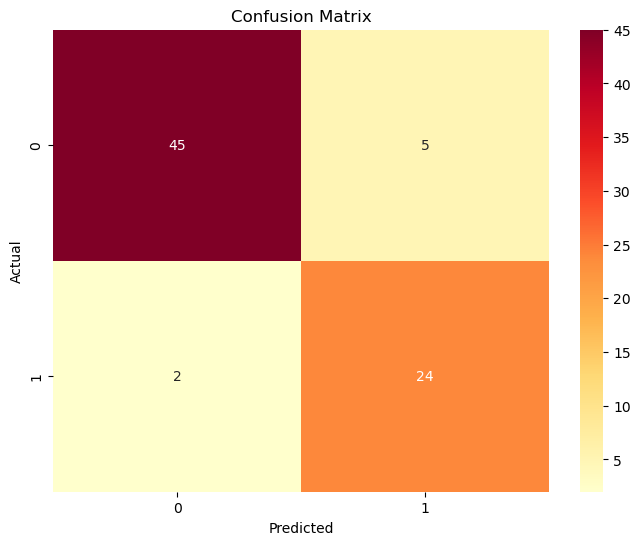

In [46]:
# Confusion Matrix untuk set testing
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

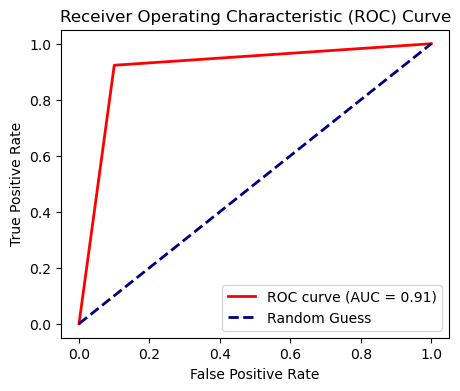

In [47]:
#membuat kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h1>Hasil Prediksi : </h1>


In [48]:
#Membuat inputan data
Input_data = {
    'Pregnancies': float(input('Masukkan nilai untuk Pregnancies: ')),
    'Glucose': float(input('Masukkan nilai untuk Glucose: ')),
    'BloodPressure': float(input('Masukkan nilai untuk BloodPressure: ')),
    'SkinThickness': float(input('Masukkan nilai untuk SkinThickness: ')),
    'Insulin': float(input('Masukkan nilai untuk Insulin: ')),
    'BMI': float(input('Masukkan nilai untuk BMI: ')),
    'DiabetesPedigreeFunction': float(input('Masukkan nilai untuk DiabetesPedigreeFunction: ')),
    'Age': float(input('Masukkan nilai untuk Age: '))
}

# Membuat DataFrame dengan fitur dari Input_data
df_input = pd.DataFrame([Input_data])

scaler = StandardScaler()
df_input_scaled = scaler.fit_transform(df_input)

# membuat prediksi dari model yang sudah disimpan sebelumnya
predictions = saved_model.predict(df_input_scaled)

# merubah ke binary hasil prediksinya kemudian dimasukkan ke data frame tadi dengan nama fitur Prediksi
binary_predictions = (predictions > 0.5).astype(int)
df_input['Prediksi'] = binary_predictions.flatten()


Masukkan nilai untuk Pregnancies: 1
Masukkan nilai untuk Glucose: 128
Masukkan nilai untuk BloodPressure: 88
Masukkan nilai untuk SkinThickness: 39
Masukkan nilai untuk Insulin: 110
Masukkan nilai untuk BMI: 36.5
Masukkan nilai untuk DiabetesPedigreeFunction: 1.057
Masukkan nilai untuk Age: 37
1/1 [==============================] - 0s 47ms/step


In [49]:
df_input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Prediksi
0,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1


didapatkan dari percobaan diatas berhasil, dimana saya memasukan nilai inputan pada data ke-751 yang memberikan Outcome 1. Dari percobaan model ANN ini dengan akurasi sebesar 91% mampu memprediksi dari inputan pada tiap variabel independen. Dan perlu diingat lagi dari heatmap sebelumnya bahwa nilai glucosa yang tinggi menjadi salah satu varibel yang berhubungan tinggi dalam penyakit diabetes.

<CENTER><H1>TERIMA KASIH</H1>